<a href="https://colab.research.google.com/github/kirtilakhdh/ScikitLearnRegression/blob/master/EDA_of_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

In [ ]:
#load data
train_df = pd.read_csv("/content/titanic.csv")
test_df = pd.read_csv("/content/test.csv")


In [ ]:
# exploratory data analisis

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
print("-"*70)

----------------------------------------------------------------------


In [ ]:
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# data visulization

## (a) how many passemger survived sinking ?

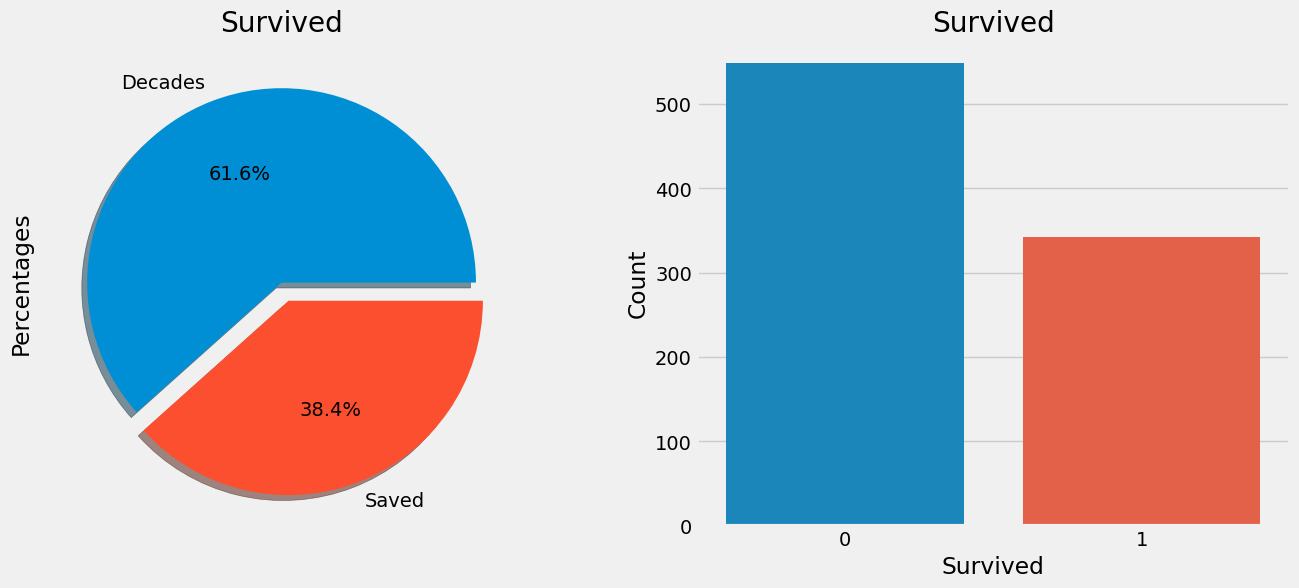

In [ ]:
f ,ax = plt.subplots(1,2,figsize = (15,6))
train_df['Survived'].value_counts().plot.pie(labels = ['Decades','Saved'],explode = [0,0.1],autopct = '%1.1f%%',ax = ax[0],shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('Percentages')
sns.countplot(data = train_df,x = 'Survived',ax = ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('Count')
plt.show()



 ## b) does a GENDER HAVE A higher survived rate than another?

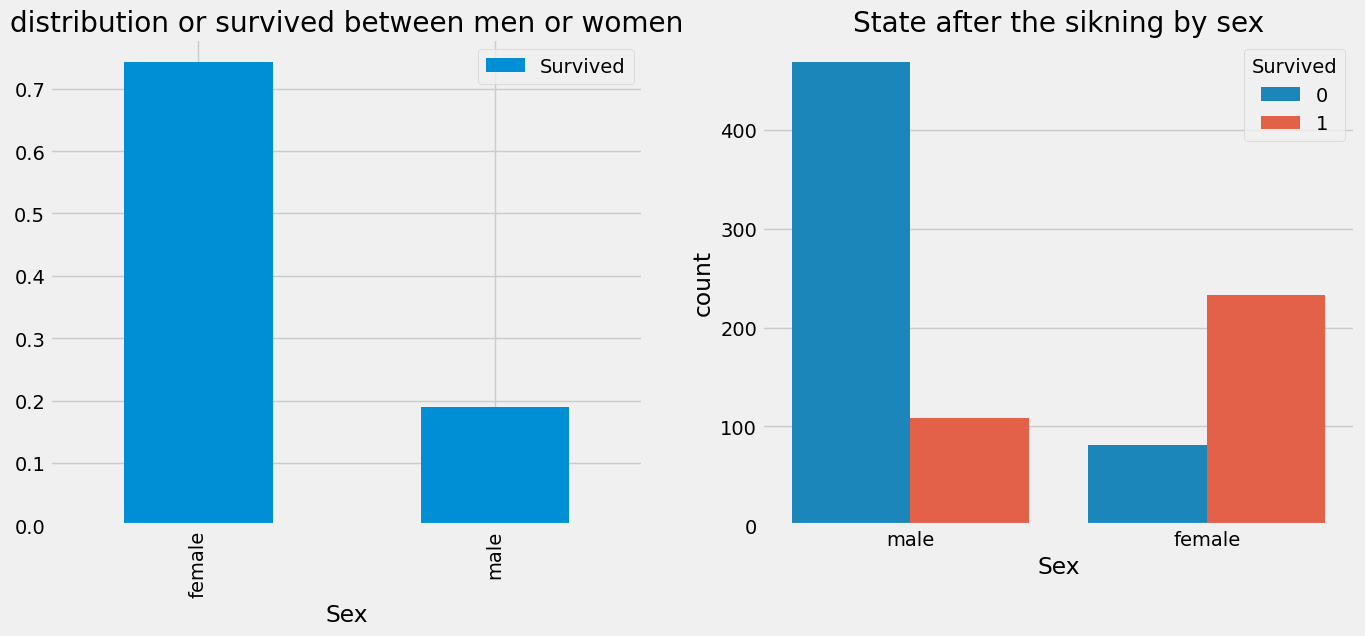

In [ ]:
f ,ax = plt.subplots(1,2,figsize = (15,6))
train_df[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax = ax[0])
ax[0].set_title('distribution or survived between men or women')
sns.countplot(data = train_df,x = 'Sex',hue = 'Survived',ax = ax[1])
ax[1].set_title('State after the sikning by sex')
plt.show()   

## (c) does a higher class passsenger have higher chance to begin saved?

In [ ]:
pd.crosstab(train_df.Pclass,train_df.Survived,margins = True).style.background_gradient(cmap ='rocket_r') 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


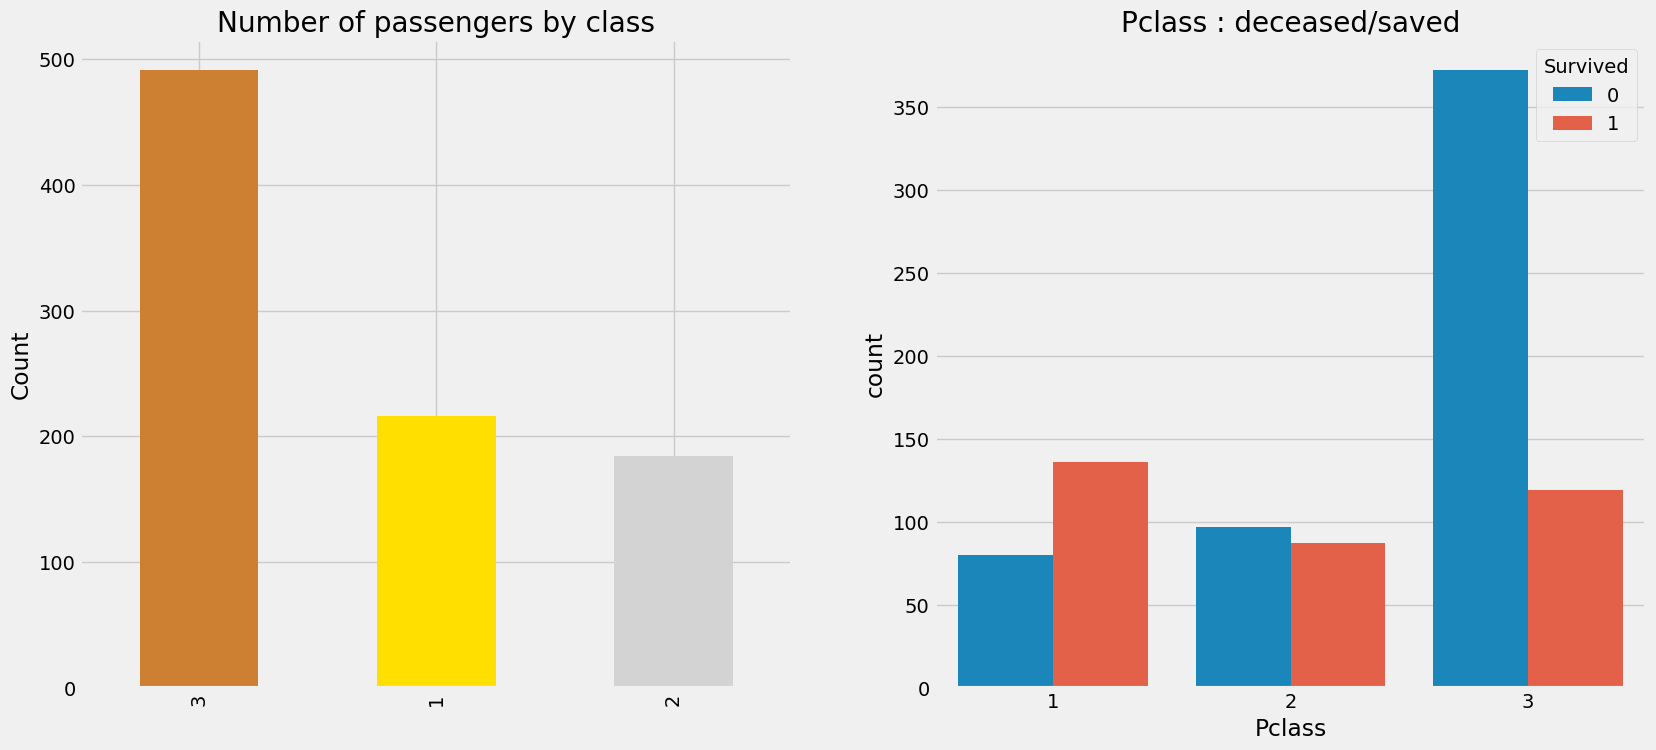

In [ ]:
f,ax = plt.subplots(1,2,figsize = (18,8))
train_df['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'],
                                          ax = ax[0])
ax[0].set_title('Number of passengers by class')
ax[0].set_ylabel('Count')
sns.countplot(data = train_df,x = 'Pclass',hue = 'Survived',ax = ax[1])
ax[1].set_title('Pclass : deceased/saved')
plt.show()


## (d) But if we use combin the passenger pclass and its gender?

In [ ]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins = True).style.background_gradient(cmap = 'rocket_r')

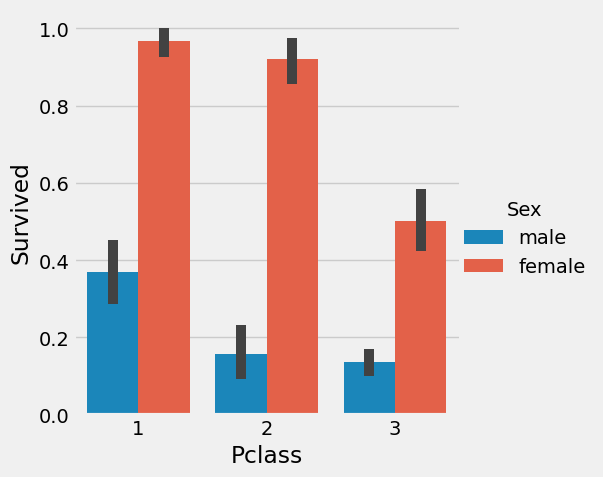

In [ ]:
sns.catplot(data = train_df,x = 'Pclass',y = 'Survived',hue = 'Sex',kind = 'bar')
plt.show()

## (e) is the age of the passenger is a good indicator for list survived rate?

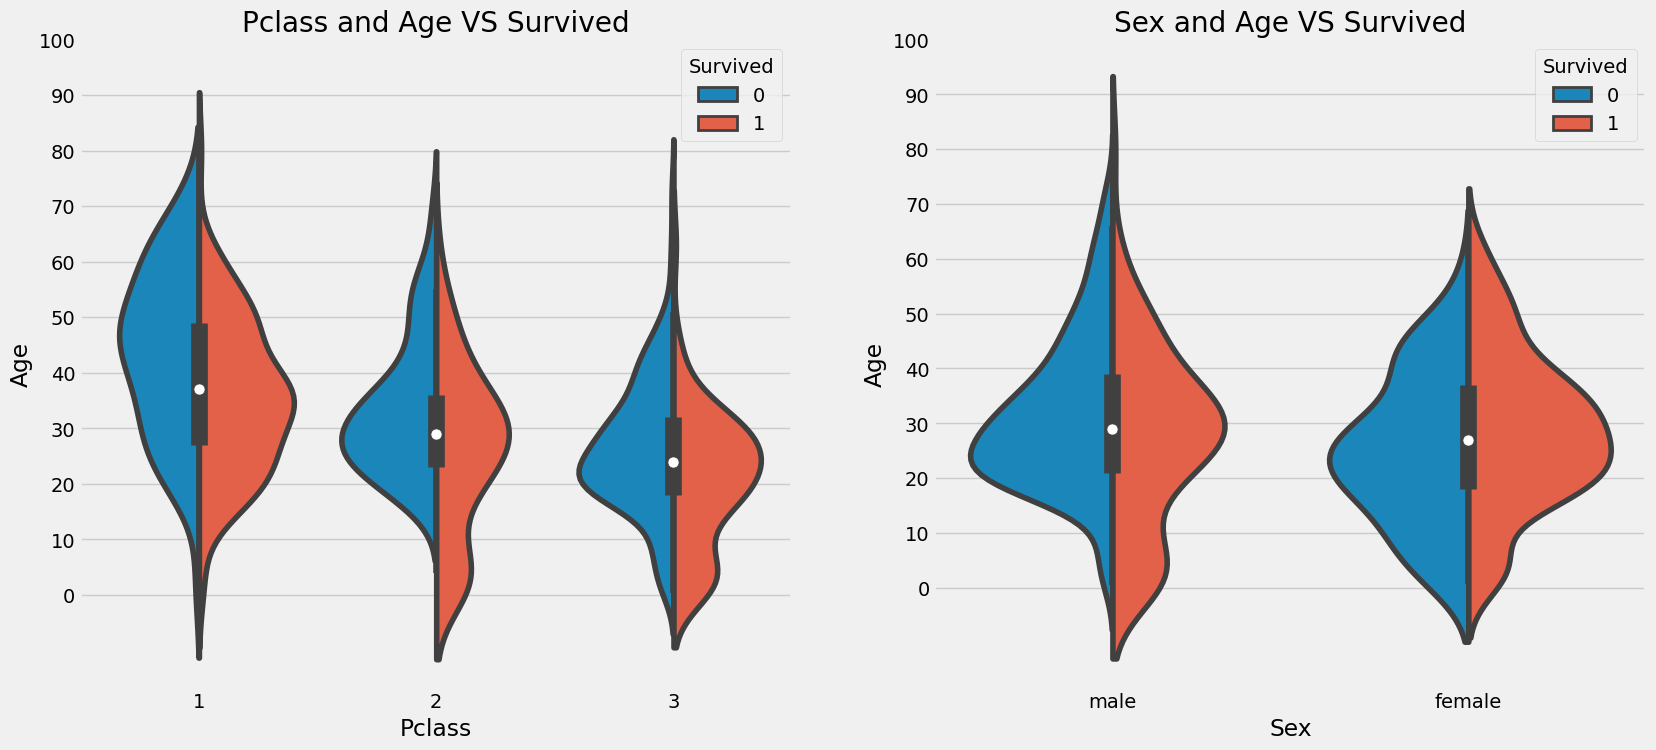

In [ ]:
f ,ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot(data = train_df,x = 'Pclass',y = 'Age',hue = 'Survived',split = True,ax = ax[0])
ax[0].set_title("Pclass and Age VS Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data = train_df,x = 'Sex',y = 'Age',hue = 'Survived',split = True,ax = ax[1])
ax[1].set_title("Sex and Age VS Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

## (f) is the part of embarkmenr a good indicator of survived?

In [ ]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins = True).style.background_gradient(cmap = 'rocket_r')

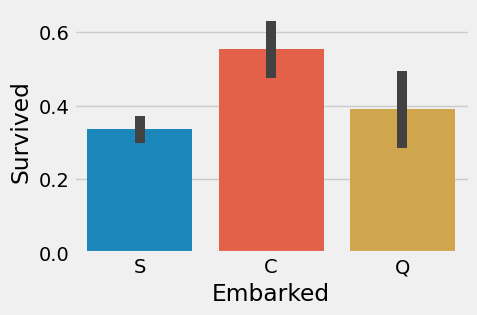

In [ ]:
sns.catplot(data = train_df,x = 'Embarked',y = 'Survived',kind = 'bar')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

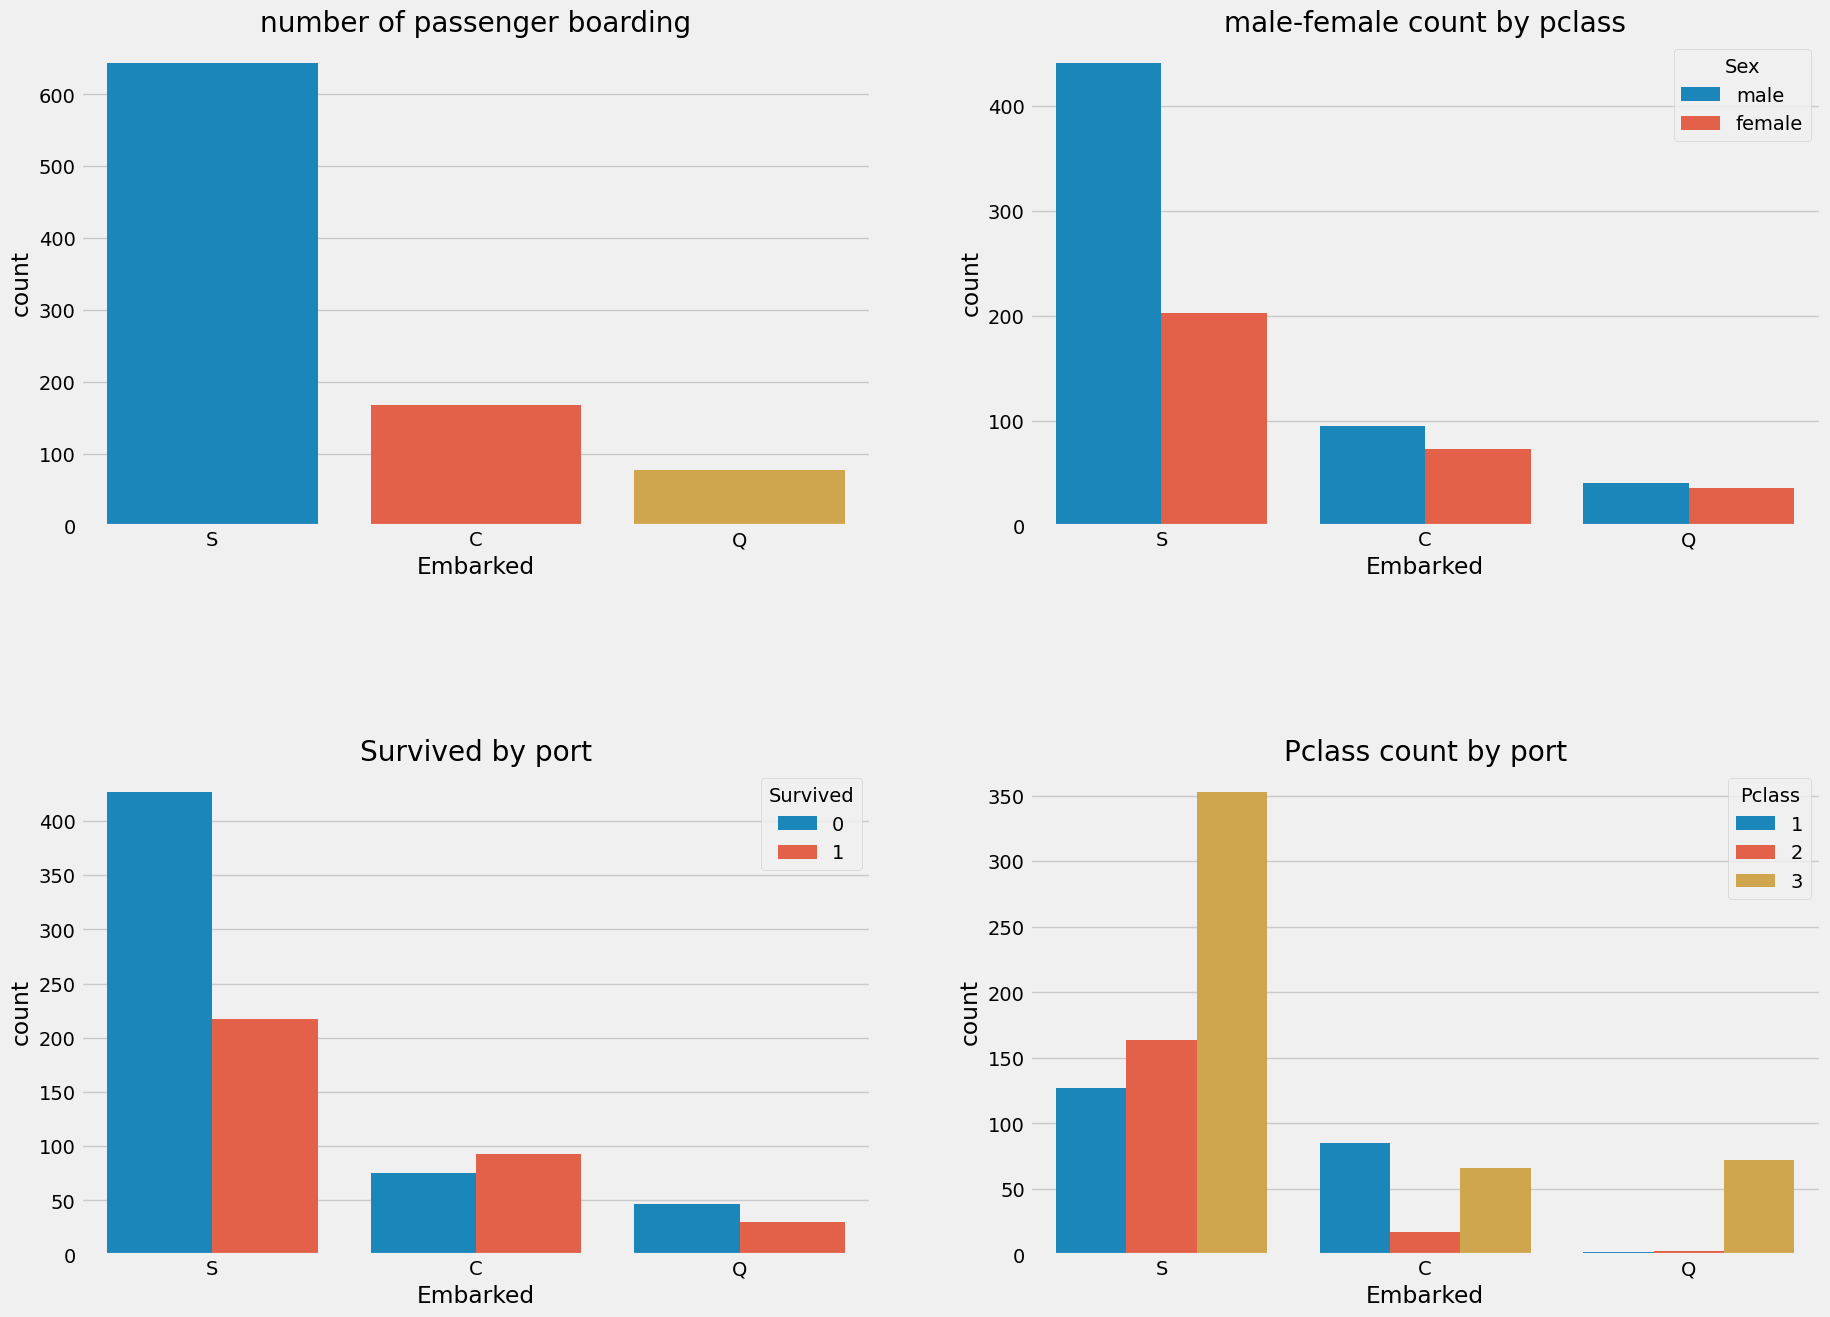

In [ ]:
f,ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot(data = train_df,x = 'Embarked',ax = ax[0,0])
ax[0,0].set_title("number of passenger boarding")

sns.countplot(data = train_df,x = 'Embarked',hue = 'Sex',ax = ax[0,1])
ax[0,1].set_title("male-female count by pclass")

sns.countplot(data = train_df,x = 'Embarked',hue = 'Survived',ax = ax[1,0])
ax[1,0].set_title("Survived by port")

sns.countplot(data = train_df,x = 'Embarked',hue = 'Pclass',ax = ax[1,1])
ax[1,1].set_title("Pclass count by port")

plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
plt.show()


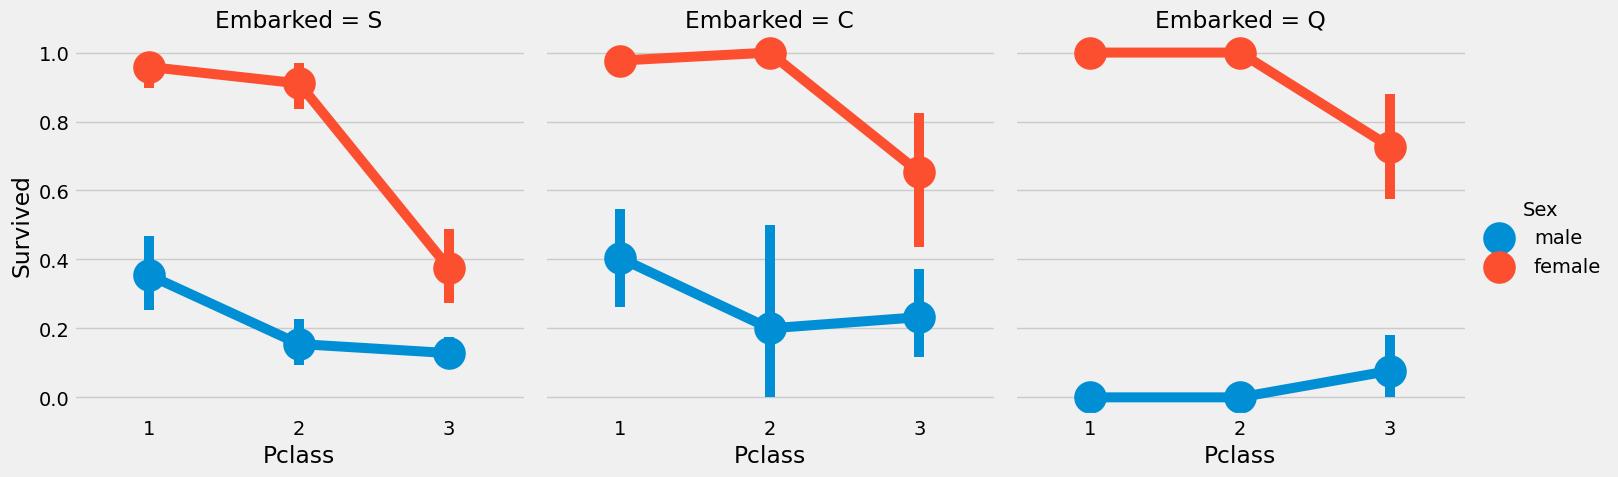

In [ ]:
sns.catplot(data = train_df,x = 'Pclass',y = 'Survived',hue = 'Sex',col = 'Embarked', kind = 'point')
plt.show()

## (g) does a passenger travelling with his family has a higher survival rate ?

In [ ]:

pd.crosstab([train_df.SibSp],train_df.Survived).style.background_gradient(cmap = 'rocket_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [ ]:
pd.crosstab([train_df.Parch],train_df.Survived).style.background_gradient(cmap = 'rocket_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [ ]:
pd.crosstab(train_df.SibSp,train_df.Pclass).style.background_gradient(cmap = 'rocket_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [ ]:
pd.crosstab(train_df.Parch,train_df.Pclass).style.background_gradient(cmap = 'rocket_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


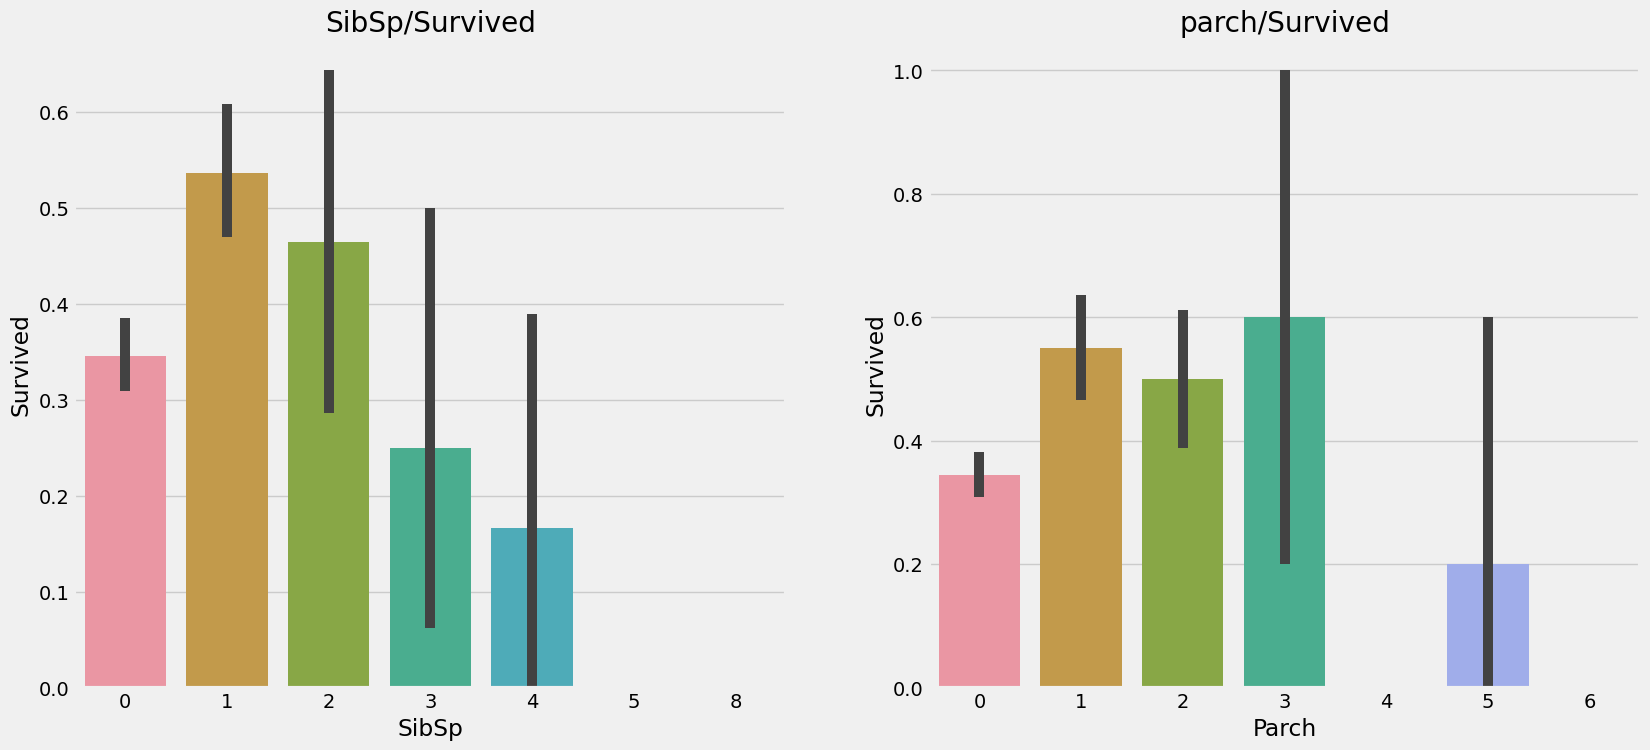

In [ ]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.barplot(data = train_df,x = 'SibSp',y = 'Survived',ax = ax[0])
ax[0].set_title("SibSp/Survived")

sns.barplot(data = train_df,x = 'Parch',y = 'Survived',ax = ax[1])
ax[1].set_title("parch/Survived")

plt.show()

## (h) how much did each class pay their titanic ticket?

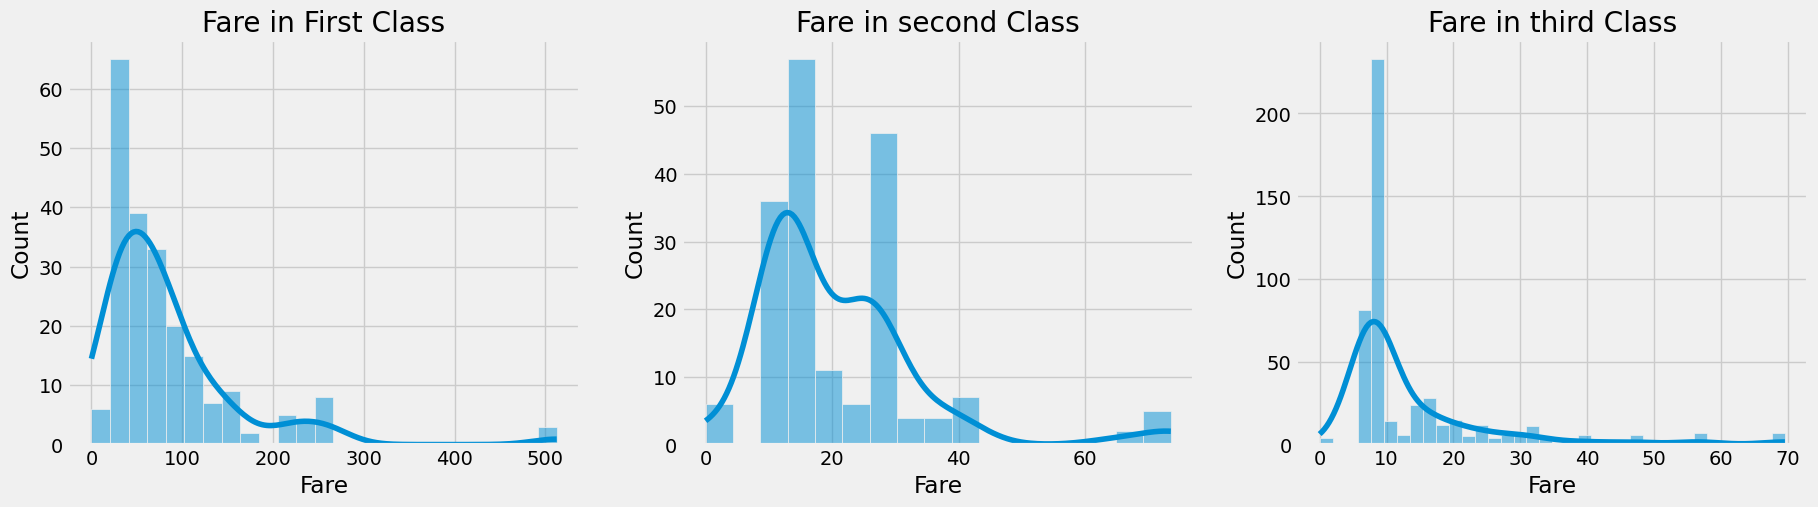

In [ ]:
f,ax = plt.subplots(1,3,figsize = (20,5))

sns.histplot(train_df[train_df['Pclass'] == 1].Fare,kde = True,ax = ax[0])
ax[0].set_title("Fare in First Class")

sns.histplot(train_df[train_df['Pclass'] == 2].Fare,kde = True,ax = ax[1])
ax[1].set_title("Fare in second Class")

sns.histplot(train_df[train_df['Pclass'] == 3].Fare,kde = True,ax = ax[2])
ax[2].set_title("Fare in third Class")
plt.show()

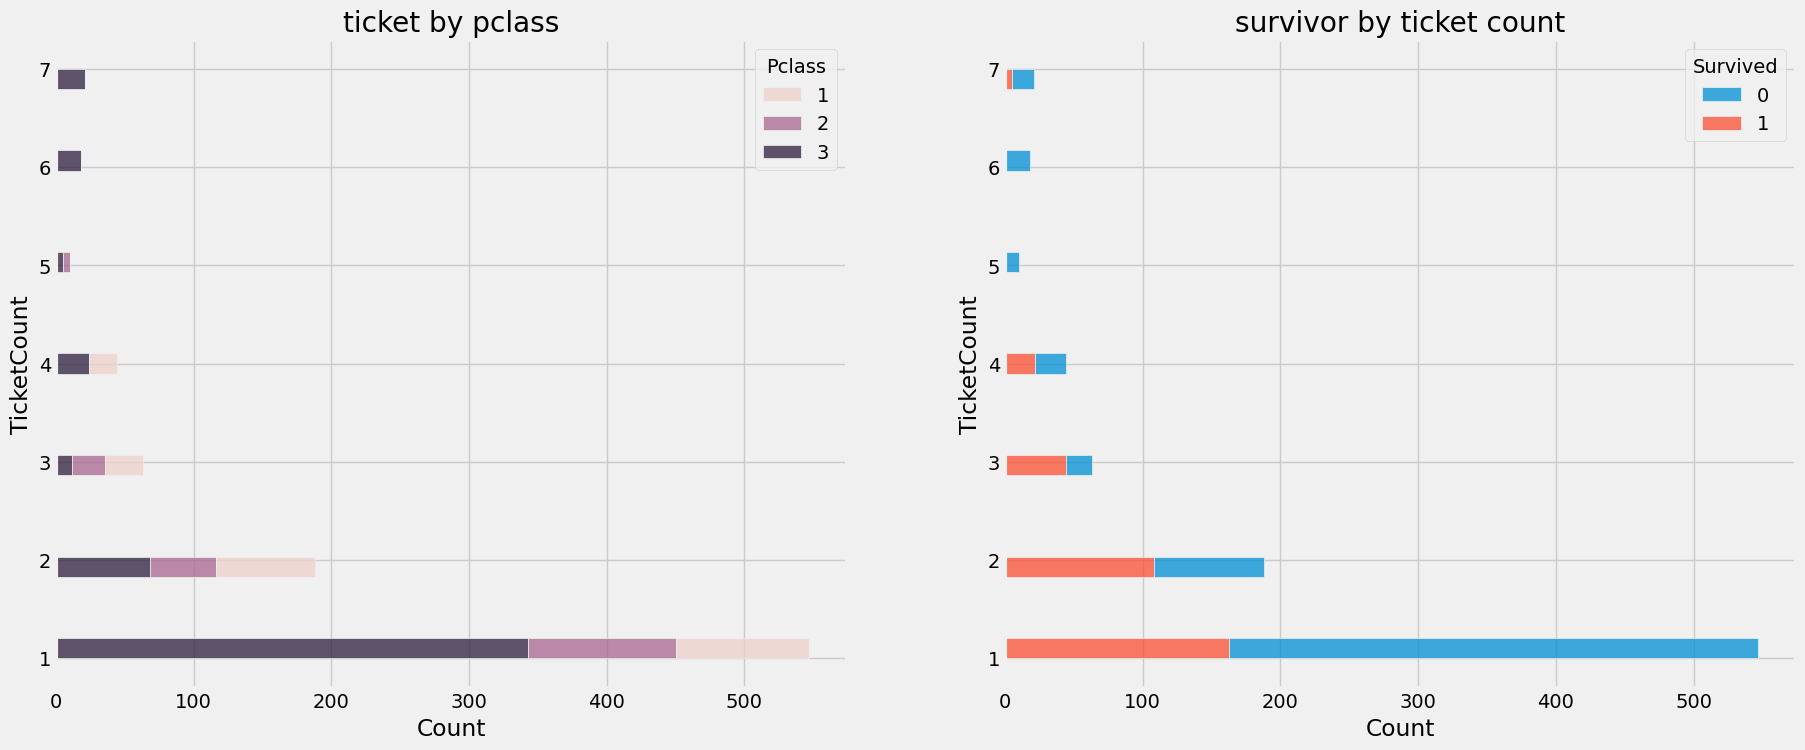

In [ ]:
train_copy = train_df.copy()
ticket_count = train_df.groupby(['Ticket']).size()
train_copy['TicketCount'] = train_copy['Ticket'].map(ticket_count)

f,ax = plt.subplots(1,2,figsize=(20,8))

sns.histplot(data = train_copy,y = 'TicketCount',hue = 'Pclass',multiple = 'stack',ax = ax[0])
ax[0].set_title('ticket by pclass')

sns.histplot(data = train_copy,y = 'TicketCount',hue = 'Survived',multiple = 'stack',ax = ax[1])
ax[1].set_title('survivor by ticket count')

plt.show()

# 3. Correlations between numerical features

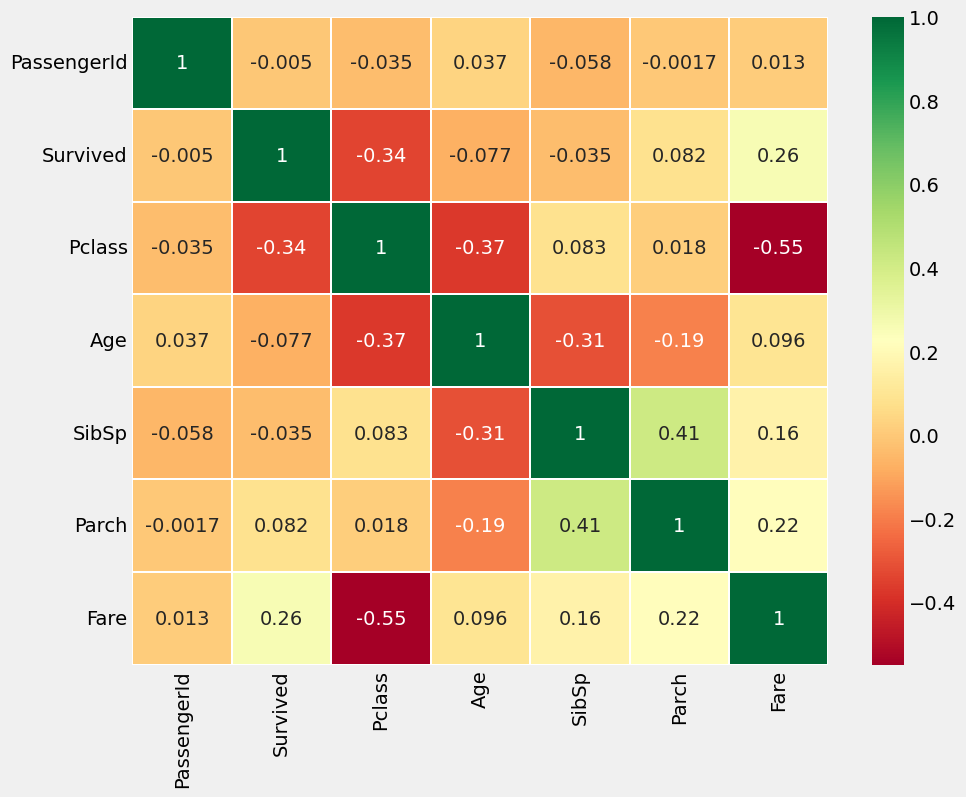

In [ ]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) # correlation matrix
fig = plt.gcf() # add the matrix to fig
fig.set_size_inches(10,8) # set the fig size
plt.show() # show the matrix

# II. Feature Engineering and Data Wrangling

## 1. Data Wrangling

### a. Filling missing values from the Age column

In [ ]:
train_df['Age'].isnull().sum()

177

In [ ]:
train_df[['Name','Sex']].head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [ ]:
train_df['Title'] = 0
for i in train_df:
    train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.')
    
    
test_df['Title'] = 0
for i in test_df:
    test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.')
    
    
pd.crosstab(train_df.Title,train_df.Sex).T.style.background_gradient(cmap = 'rocket_r')    

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
train_df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                          ['Miss','Miss','Miss','Other','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)
test_df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                         ['Miss','Miss','Miss','Other','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)

train_df.groupby('Title')['Age'].mean() # Mean age for each Title

Title
Master     4.574167
Miss      21.860000
Mr        32.601737
Mrs       35.981818
Other     44.333333
Name: Age, dtype: float64

In [ ]:
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Mr'),'Age'] =33
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='Mrs'),'Age'] =36
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='Master'),'Age'] =5
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='Miss'),'Age'] =22
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='other'),'Age'] =45

test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Mr'),'Age'] =33
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Mrs'),'Age'] =36
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Master'),'Age'] =5
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Miss'),'Age'] =22
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='other'),'Age'] =45

In [ ]:
train_df.Age.isnull().any()

True

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
train_df['Age'].fillna(train_df.Age.mean(),inplace = True)

# b. Filling missing values from the Embarked column

In [ ]:
train_df.Embarked.isnull().sum()

2

In [ ]:
train_df['Embarked'].fillna('S',inplace=True)
test_df['Embarked'].fillna('S',inplace=True)

train_df.Embarked.isnull().any()

False

In [ ]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Title          False
dtype: bool

## c. Convert string values into numerical values

In [ ]:
train_df['Sex'].replace(['male','female'],[0,1],inplace = True)
train_df = pd.get_dummies(train_df,columns = ['Embarked','Title'],drop_first = True)

test_df['Sex'].replace(['male','female'],[0,1],inplace = True)
test_df= pd.get_dummies(test_df,columns = ['Embarked','Title'],drop_first = True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1,0,0


In [ ]:
train_df['AgeBond'] = 0
train_df.loc[(train_df.Age<=16),'AgeBond'] = 0
train_df.loc[(train_df.Age >16) & (train_df.Age <= 32),'AgeBond'] = 1
train_df.loc[(train_df.Age >32) & (train_df.Age <= 48),'AgeBond'] = 2
train_df.loc[(train_df.Age >48) & (train_df.Age <= 64),'AgeBond'] = 3
train_df.loc[(train_df.Age >64),'AgeBond'] = 4

test_df['AgeBond'] = 0
test_df.loc[(test_df.Age<=16),'AgeBond'] = 0
test_df.loc[(test_df.Age >16) & (test_df.Age <= 32),'AgeBond'] = 1
test_df.loc[(test_df.Age >32) & (test_df.Age <= 48),'AgeBond'] = 2
test_df.loc[(test_df.Age >48) & (test_df.Age <= 64),'AgeBond'] = 3
test_df.loc[(test_df.Age >64),'AgeBond'] = 4

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBond
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1,0,0,2


In [ ]:
train_df['AgeBond'].value_counts().to_frame().style.background_gradient(cmap = "rocket_r")

,AgeBond
1,383
2,324
0,104
3,69
4,11


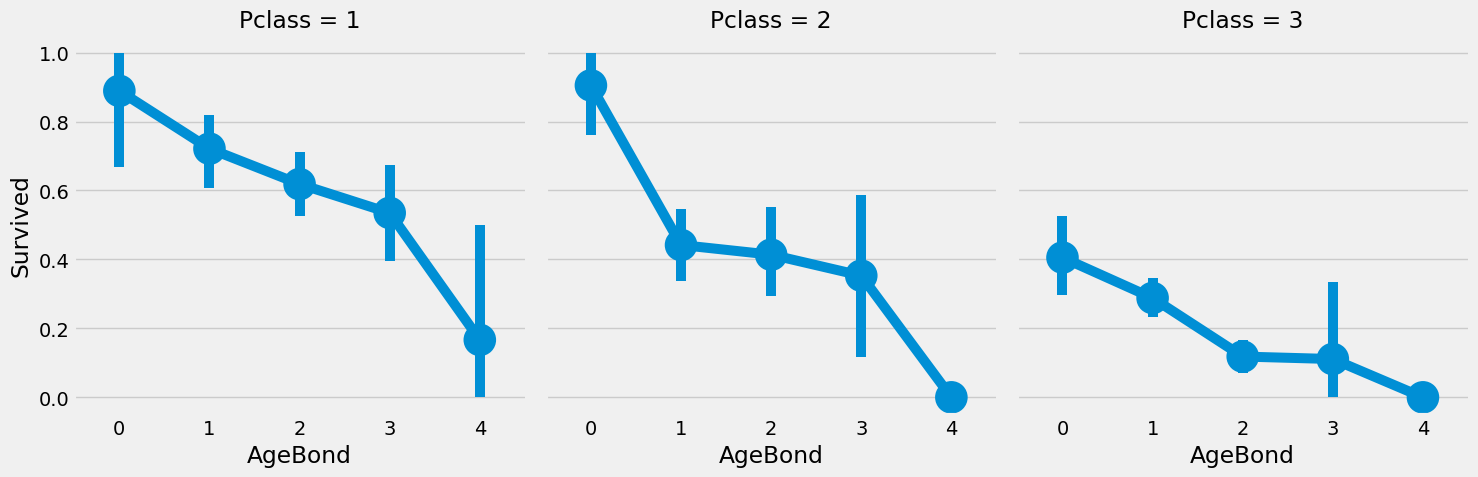

In [ ]:
sns.catplot(train_df,x = 'AgeBond',y = 'Survived',col = 'Pclass',kind = 'point')
plt.show()

## b. Extracting Family information

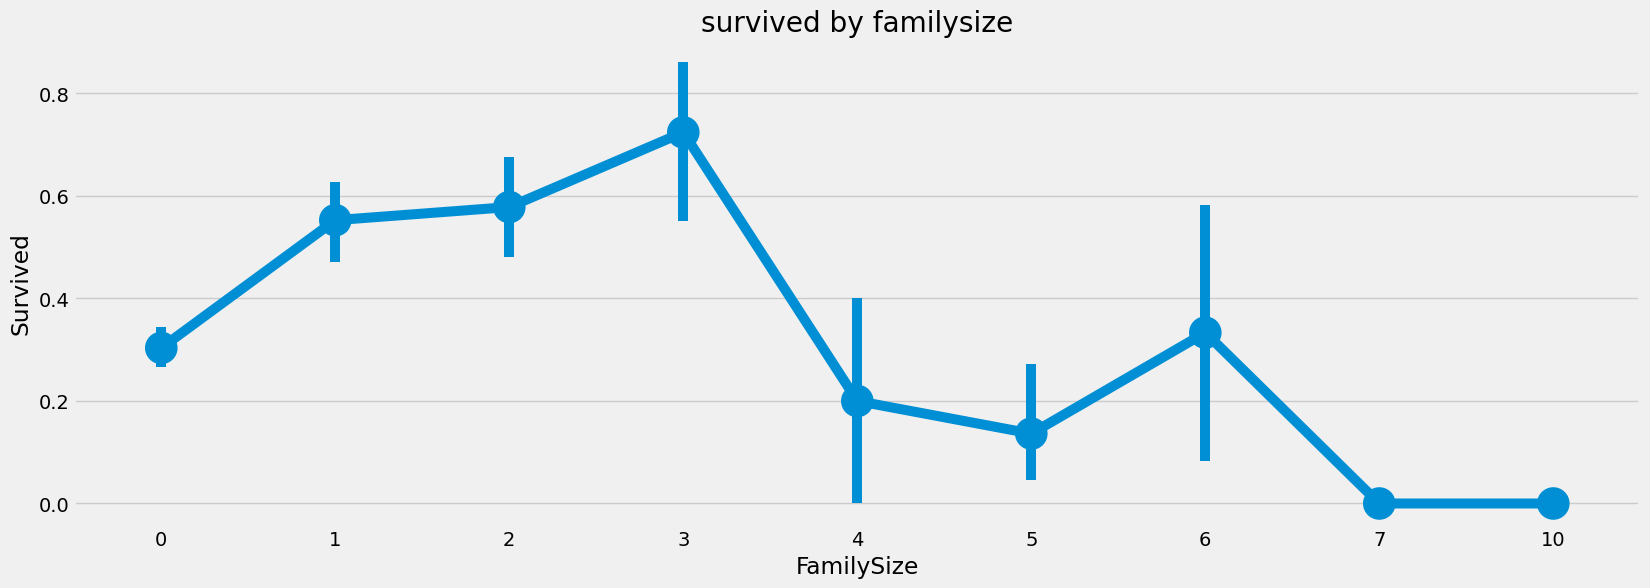

In [ ]:
train_df['FamilySize'] = 0
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

test_df['FamilySize'] = 0
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

f,ax = plt.subplots(1,1,figsize=(18,6))
sns.pointplot(data = train_df,x = 'FamilySize',y = 'Survived')
ax.set_title("survived by familysize")

plt.show()



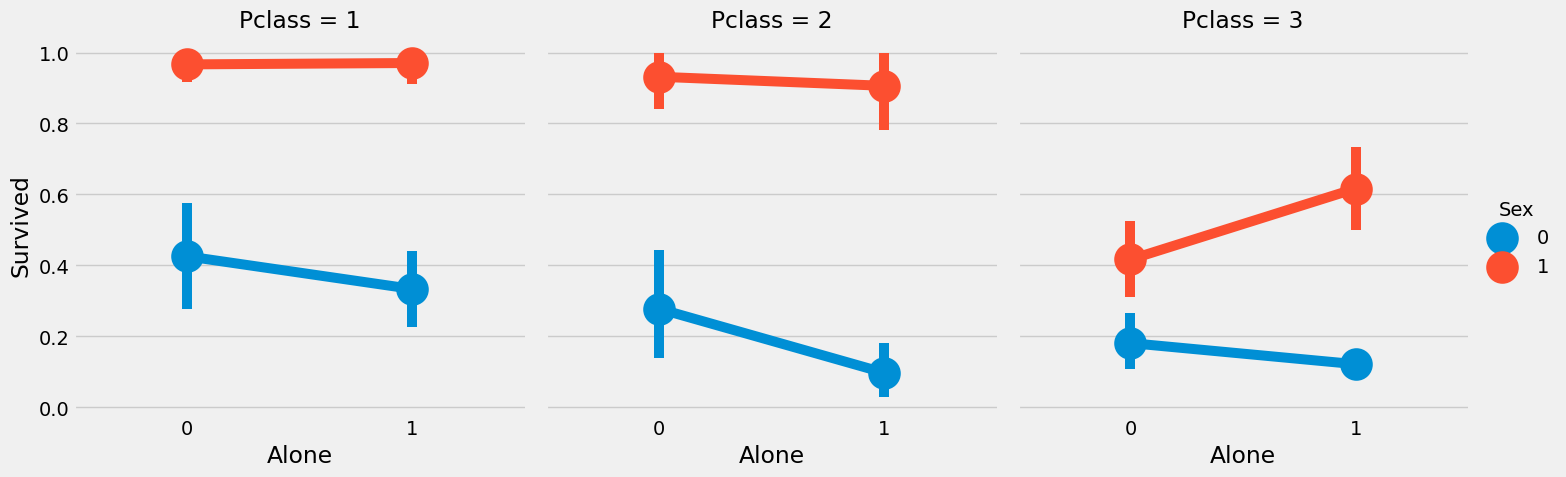

In [ ]:
alone_df = train_df.copy()
alone_df['Alone'] = 0
alone_df.loc[alone_df.FamilySize==0, 'Alone'] = 1

sns.catplot(data=alone_df, x='Alone', y='Survived', hue='Sex', col='Pclass', kind="point")
plt.show()

****

## c. Extracting Fare information

In [ ]:
train_copy['FareRange'] = pd.qcut(train_copy['Fare'],4)
train_copy.groupby(['FareRange'])['Survived'].mean().to_frame().style.background_gradient(cmap='rocket_r')

,Survived
FareRange,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


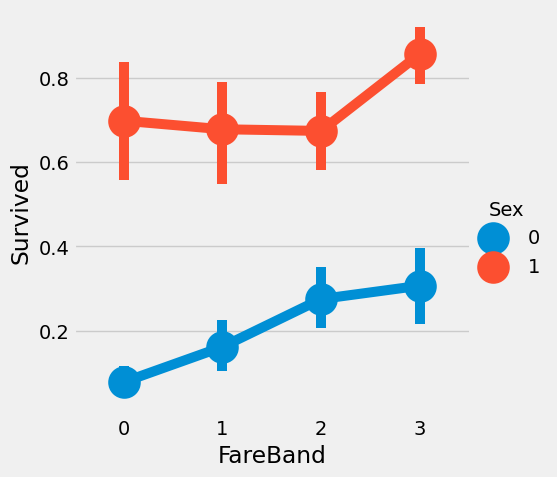

In [ ]:
train_df['FareBand'] = 0
train_df.loc[train_df['Fare'] <= 7.91, 'FareBand'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'FareBand'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'FareBand'] = 2
train_df.loc[(train_df['Fare'] > 31) & (train_df['Fare'] <= 513), 'FareBand'] = 3

test_df['FareBand'] = 0
test_df.loc[test_df['Fare'] <= 7.91, 'FareBand'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'FareBand'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'FareBand'] = 2
test_df.loc[(test_df['Fare'] > 31) & (test_df['Fare'] <= 513), 'FareBand'] = 3

sns.catplot(data=train_df, x='FareBand', y='Survived', hue='Sex', kind="point")
plt.show()

## d. Dropping unneeded features

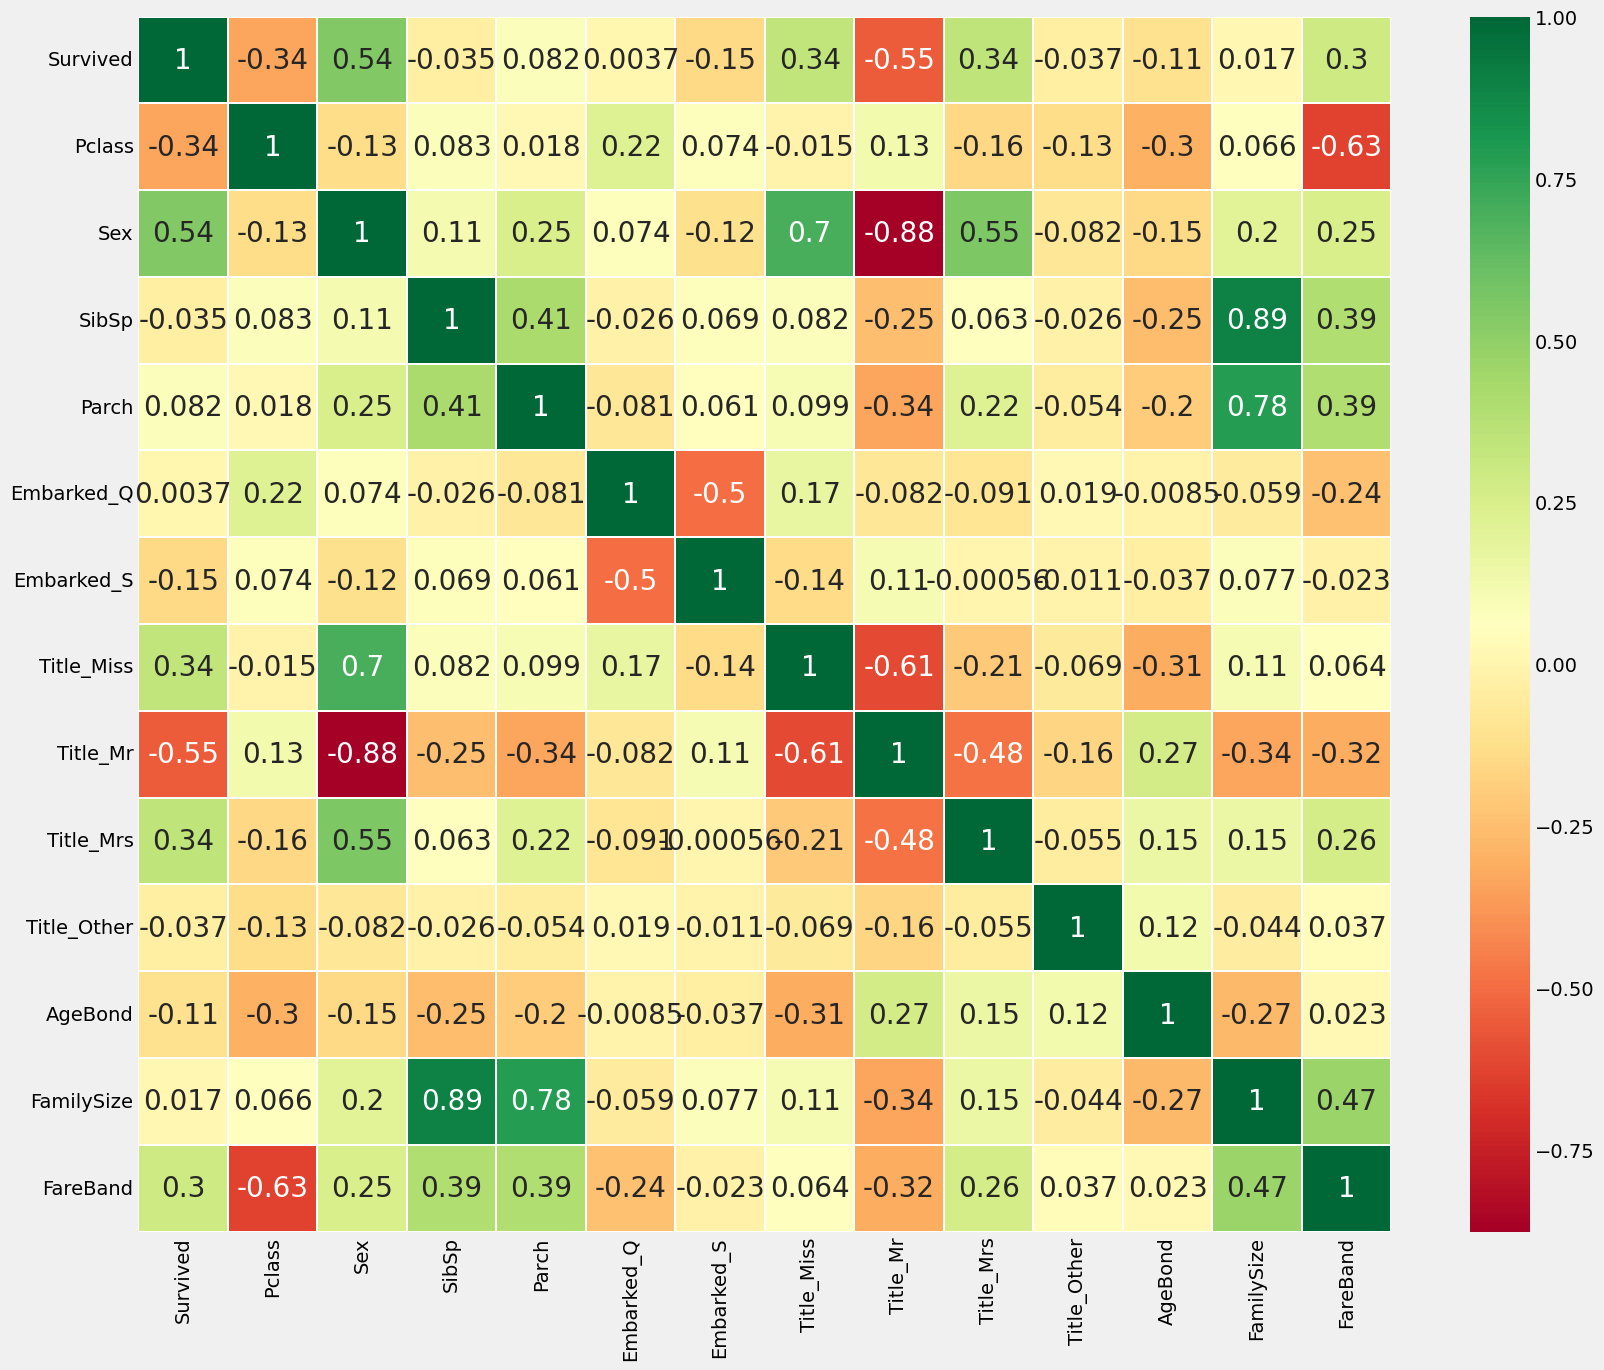

In [ ]:
train_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)

sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# III. Predictive Modeling

In [ ]:
train, val = train_test_split(train_df, test_size=0.3, random_state=0, stratify=train_df['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = val[val.columns[1:]]
test_Y = val[val.columns[:1]]
X = train_df[train_df.columns[1:]]
Y = train_df['Survived']

 # 1. Logistic Regression

In [ ]:
model = LogisticRegression(random_state = 1)
model.fit(train_X,train_Y.values.ravel())
prediction = model.predict(test_X)
print('the accuracy of the linear regression is : ',metrics.accuracy_score(prediction,test_Y) )

the accuracy of the linear regression is :  0.8283582089552238


# 2. Linear Support Vector Machine

In [ ]:
model = SVC(kernel = 'linear',C = 0.1,gamma = 0.1,random_state = 1)
model.fit(train_X,train_Y.values.ravel())
prediction = model.predict(test_X)
print('the accuracy of the SVC is : ',metrics.accuracy_score(prediction,test_Y) )

the accuracy of the SVC is :  0.8022388059701493


# 3. Radial Support Vector Machine

In [ ]:
model = SVC(kernel = 'rbf',C = 0.1,gamma = 0.1,random_state = 1)
model.fit(train_X,train_Y.values.ravel())
prediction = model.predict(test_X)
print('the accuracy of the radial SVM is : ',metrics.accuracy_score(prediction,test_Y) )

the accuracy of the radial SVM is :  0.8246268656716418


# 4. K-Nearest Neighbours

In [ ]:
model = KNeighborsClassifier()
model.fit(train_X,train_Y.values.ravel())
prediction = model.predict(test_X)
print('the accuracy of the radial KNN is : ',metrics.accuracy_score(prediction,test_Y) )

the accuracy of the radial KNN is :  0.8208955223880597


<ipython-input-57-d2ed4b52ab55>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric = metric.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
<ipython-input-57-d2ed4b52ab55>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric = metric.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
<ipython-input-57-d2ed4b52ab55>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric = metric.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
<ipython-input-57-d2ed4b52ab55>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric = metric.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
<ipy

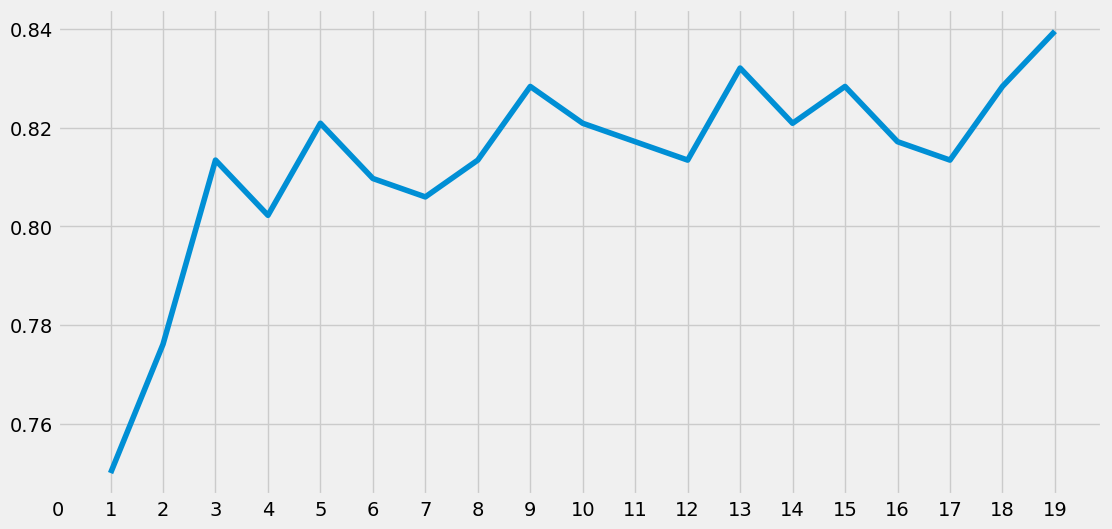

Accuracies for different values of n : [0.75       0.7761194  0.81343284 0.80223881 0.82089552 0.80970149
 0.80597015 0.81343284 0.82835821 0.82089552 0.81716418 0.81343284
 0.83208955 0.82089552 0.82835821 0.81716418 0.81343284 0.82835821
 0.83955224] with 0.8395522388059702 as the max value.


In [ ]:
metric_index = list(range(1,20))
metric = pd.Series(dtype='float64')
for i in list(range(1,20)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_Y.values.ravel())
    prediction = model.predict(test_X)
    metric = metric.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(metric_index, metric)
plt.xticks(list(range(0,20)))
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n :', metric.values, 'with', metric.values.max(), 'as the max value.')

# 5. Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(train_X,train_Y.values.ravel())
prediction = model.predict(test_X)
print('the accuracy of the NaiveBayes is : ',metrics.accuracy_score(prediction,test_Y) )

the accuracy of the NaiveBayes is :  0.8059701492537313


# 6. Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state = 1)
model.fit(train_X,train_Y.values.ravel())
prediction = model.predict(test_X)
print('the accuracy of the Decisiontreeclssifier is : ',metrics.accuracy_score(prediction,test_Y) )

the accuracy of the Decisiontreeclssifier is :  0.8059701492537313


# 7. Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators = 100,random_state = 1)
model.fit(train_X,train_Y.values.ravel())
prediction = model.predict(test_X)
print('the accuracy of the random forest clssifier is : ',metrics.accuracy_score(prediction,test_Y) )

the accuracy of the random forest clssifier is :  0.7985074626865671


# IV. Cross Validation

In [ ]:
kfold = KFold(n_splits=10) # k = 10, split the data into 10 equal parts
mean = []
accuracy = []
std = []
classifiers=['Logistic Regression', 'Linear Svm', 'Radial Svm', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree',  'Random Forest']
models=[LogisticRegression(), SVC(kernel='linear'), SVC(kernel='rbf'), KNeighborsClassifier(n_neighbors=13), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = "accuracy")
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_variance = pd.DataFrame({'CV Mean':mean,'Std':std}, index=classifiers)       
models_variance
    
    

,CV Mean,Std
Logistic Regression,0.821548,0.027726
Linear Svm,0.821548,0.036390
Radial Svm,0.829413,0.037828
KNN,0.814881,0.040801
Gaussian Naive Bayes,0.804669,0.038512
Decision Tree,0.812634,0.036159
Random Forest,0.811461,0.032401


<Axes: >

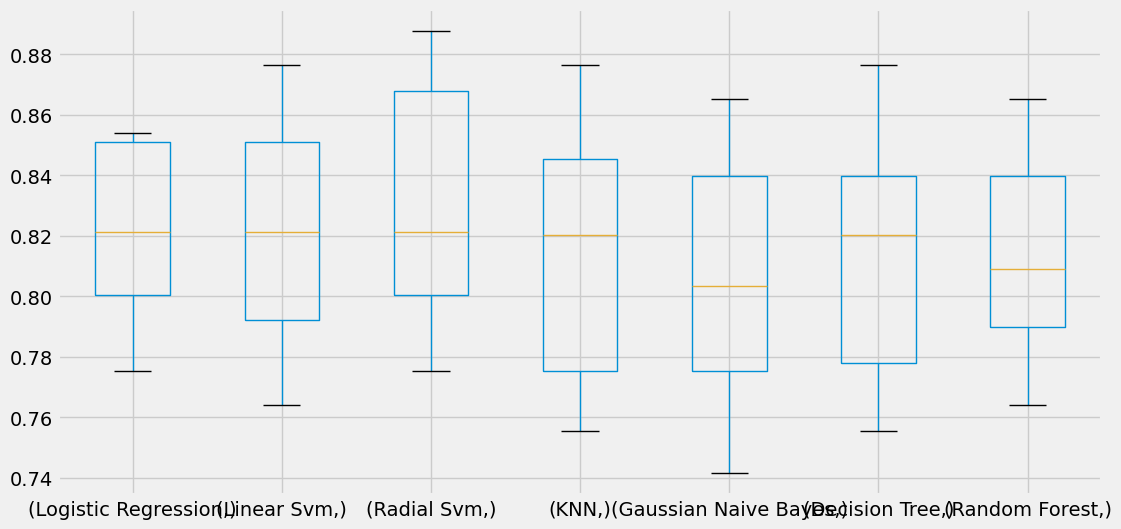

In [ ]:
plt.subplots(figsize = (12,6))
model_variance_box = pd.DataFrame(accuracy,index = [classifiers])
model_variance_box.T.boxplot()

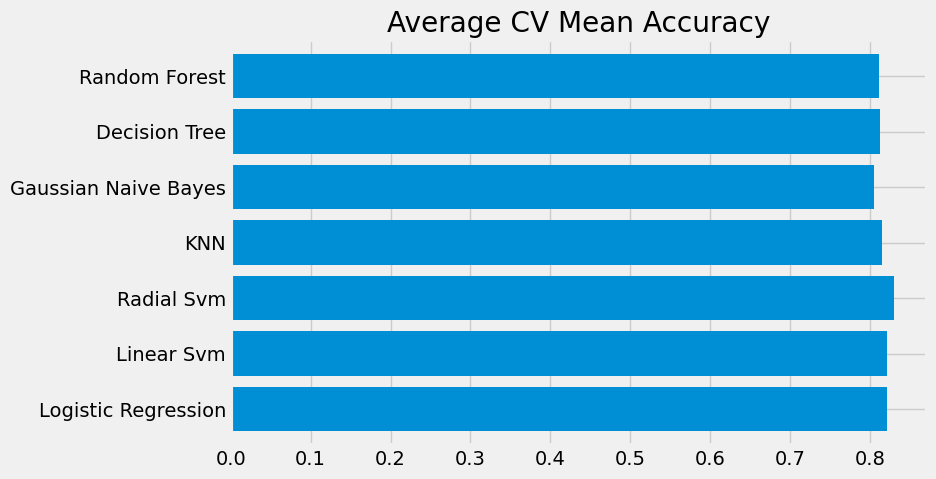

In [ ]:
models_variance['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

# 2. Confusion Matrix

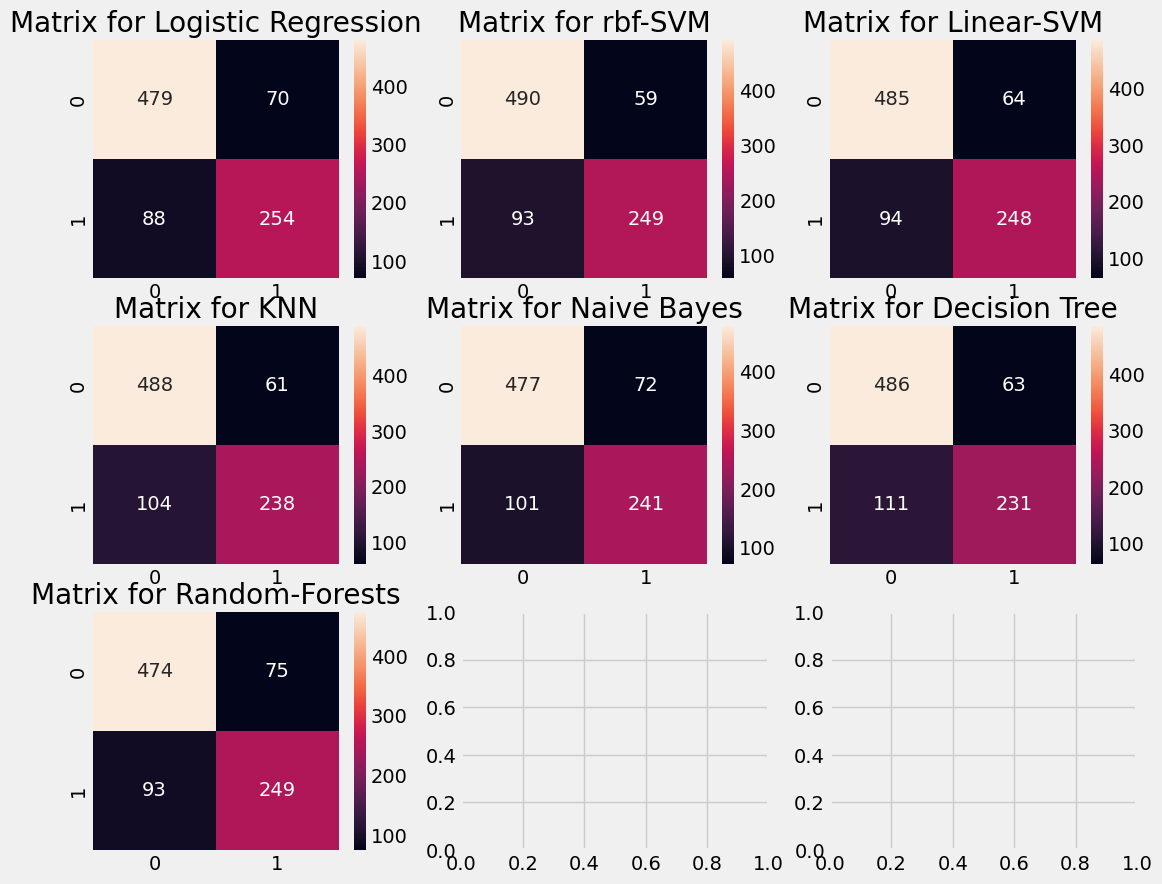

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=11),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for KNN')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Random-Forests')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

1. # 3. Hyperparameters tuning

In [ ]:
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
grid = GridSearchCV(estimator=SVC(), param_grid=hyper, verbose=True)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8316238779737619
{'C': 0.6, 'gamma': 0.2, 'kernel': 'rbf'}


In [ ]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'C':C}
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=hyper, verbose=True)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)

# V. Ensembling

## 1. Voting Classifier

In [ ]:
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=13)),
                                              ('RBF', SVC(probability=True, kernel='rbf', C=0.6, gamma=0.2)),
                                              ('RFor', RandomForestClassifier(n_estimators=400, random_state=0)),
                                              ('LR', LogisticRegression(C=0.7)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', SVC(kernel='linear', probability=True))
                                             ], 
                       voting='soft').fit(train_X, train_Y.values.ravel())
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross_score = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = "accuracy")
print('The cross validated score is', cross_score.mean())

## 2. Bagging KNN

In [ ]:
bagged_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
bagged_knn.fit(train_X, train_Y.values.ravel())
prediction = bagged_knn.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(bagged_knn, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

## b. Bagged Decision Tree

## 3. Boosting

In [ ]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

In [ ]:
gradient = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(gradient, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

In [ ]:
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

# 4. Confusion Matrix of the best model

In [ ]:
model = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=13)),
                                              ('RBF', SVC(probability=True, kernel='rbf', C=0.6, gamma=0.2)),
                                              ('RFor', RandomForestClassifier(n_estimators=400, random_state=0)),
                                              ('LR', LogisticRegression(C=0.7)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', SVC(kernel='linear', probability=True))
                                             ], 
                       voting='soft')
model.fit(X, Y)
cross_score = cross_val_score(model, X, Y, cv = 10, scoring = "accuracy")
print('The cross validated score is', cross_score.mean())

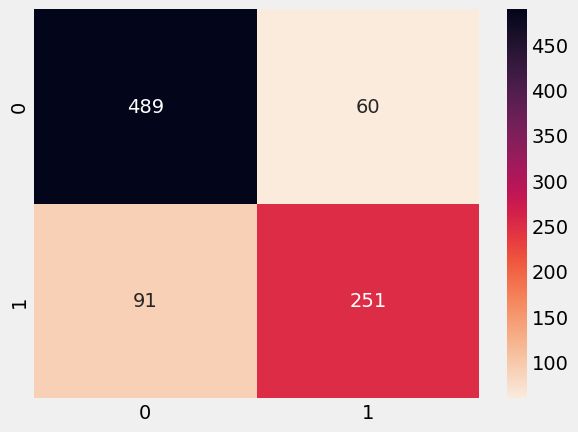

In [ ]:
result = cross_val_predict(model, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='rocket_r', annot=True, fmt='2.0f')
plt.show()

# VI. Feature Importance

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=400, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

## VII. Competition Submission¶

In [ ]:
test_df.head()

In [ ]:
model = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=13)),
                                              ('RBF', SVC(probability=True, kernel='rbf', C=0.6, gamma=0.2)),
                                              ('RFor', RandomForestClassifier(n_estimators=400, random_state=0)),
                                              ('LR', LogisticRegression(C=0.7)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', SVC(kernel='linear', probability=True))
                                             ], 
                       voting='soft')
model.fit(X, Y)
predictions = model.predict(test_df)
results = pd.DataFrame(predictions, columns=['Survived']) 

In [ ]:
results['Survived'].value_counts().plot.pie(labels=['Deceased','Saved'], explode=[0,0.1], autopct='%1.1f%%', shadow=True)

In [ ]:
final_df = test_df = pd.read_csv('/content/test.csv') # load our test dataset
final_df['Survived'] = results['Survived']

output = pd.DataFrame({'PassengerId': final_df.PassengerId, 'Survived': final_df.Survived})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")